# CLASSIFICAÇÃO

In [145]:
import pandas as pd
import numpy as np

## base credit

In [146]:
# pip install plotly
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

In [147]:
base_credit = pd.read_csv("C:/Users/danil/OneDrive/Documentos/Machine Learning e Data Science com Python de A à Z-20240611T140920Z-001/Machine Learning e Data Science com Python de A à Z/Bases de dados/credit_data.csv")

In [148]:
base_credit.head()

clientid        income        age         loan  default
0         1  66155.925095  59.017015  8106.532131        0
1         2  34415.153966  48.117153  6564.745018        0
2         3  57317.170063  63.108049  8020.953296        0
3         4  42709.534201  45.751972  6103.642260        0
4         5  66952.688845  18.584336  8770.099235        1

In [149]:
base_credit.tail(8)

clientid        income        age         loan  default
1992      1993  30803.806165  23.250084   623.024153        0
1993      1994  54421.410155  26.821928  3273.631823        0
1994      1995  24254.700791  37.751622  2225.284643        0
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

In [150]:
base_credit.describe()

clientid        income          age          loan      default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500
std     577.494589  14326.327119    13.624469   3045.410024     0.348624
min       1.000000  20014.489470   -52.423280      1.377630     0.000000
25%     500.750000  32796.459717    28.990415   1939.708847     0.000000
50%    1000.500000  45789.117313    41.317159   3974.719419     0.000000
75%    1500.250000  57791.281668    52.587040   6432.410625     0.000000
max    2000.000000  69995.685578    63.971796  13766.051239     1.000000

In [151]:
base_credit[base_credit['income'] >= 69995.685578]


clientid        income        age         loan  default
422       423  69995.685578  52.719673  2084.370861        0

In [152]:
# pegar os valores unicos de default e contar
np.unique(base_credit['default'], return_counts=True)


(array([0, 1], dtype=int64), array([1717,  283], dtype=int64))

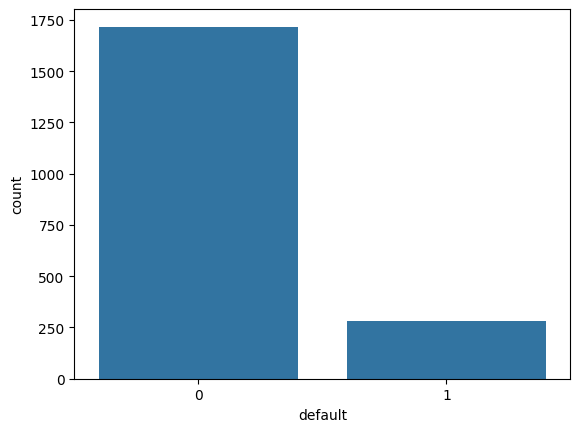

In [153]:
sns.countplot(x= base_credit['default']);


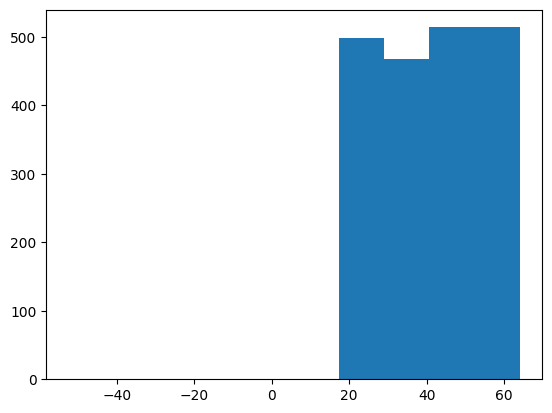

In [154]:
plt.hist(x= base_credit['age']);


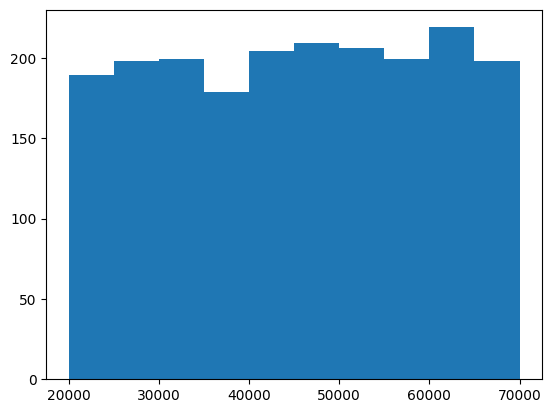

In [155]:
plt.hist(x = base_credit['income']);


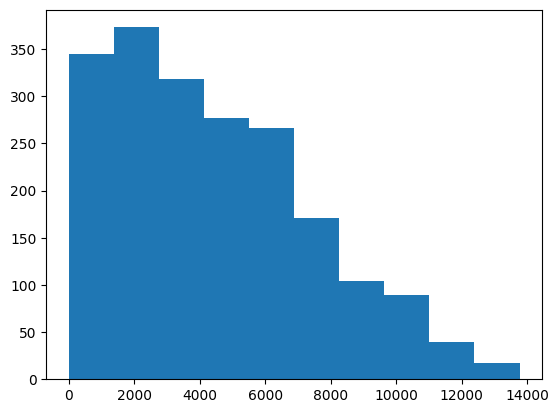

In [156]:
plt.hist(base_credit['loan']);


In [157]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color='default');
grafico


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'dimensions': [{'axis': {'matches': True},
                              'label': 'age',
                              'values': array([59.01701507, 48.1171531 , 63.10804949, ..., 28.0171669 , 63.97179584,
                                               56.15261703])},
                             {'axis': {'matches': True},
                              'label': 'income',
                              'values': array([66155.92509508, 34415.15396582, 57317.17006303, ..., 44311.44926231,
                                               43756.05660491, 69436.57955155])},
                             {'axis': {'matches': True},
                              'label': 'loan',
                              'values': array([8106.53213129, 6564.74501768, 8020.95329639, ..., 5522.78669326,
                                               1622.72259832, 7378.83359873])}],
              'hovertemplate': ('%{xaxis.title.text}=%{x}<br>%{' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'name': '',
              'showlegend': False,
              'type': 'splom'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'default'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'dragmode': 'select',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...'}
})

In [158]:
base_credit.loc[base_credit['age'] < 0]


clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

In [159]:
base_credit[base_credit['age'] < 0]


clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

In [160]:
base_credit2 = base_credit.drop('age', axis=1)
base_credit2



clientid        income         loan  default
0            1  66155.925095  8106.532131        0
1            2  34415.153966  6564.745018        0
2            3  57317.170063  8020.953296        0
3            4  42709.534201  6103.642260        0
4            5  66952.688845  8770.099235        1
...        ...           ...          ...      ...
1995      1996  59221.044874  1926.729397        0
1996      1997  69516.127573  3503.176156        0
1997      1998  44311.449262  5522.786693        1
1998      1999  43756.056605  1622.722598        0
1999      2000  69436.579552  7378.833599        0

[2000 rows x 4 columns]

In [161]:
base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit3

clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[1997 rows x 5 columns]

In [162]:
base_credit[base_credit['age'] < 0].index



Index([15, 21, 26], dtype='int64')

In [163]:
base_credit3.loc[base_credit3['age'] < 0]


Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [164]:
base_credit.mean()


clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [165]:
base_credit3['age'].mean()


40.92770044906149

In [166]:
base_credit['age'][base_credit['age']>0].mean()


40.92770044906149

In [167]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92


In [168]:
base_credit.head(27)


clientid        income        age         loan  default
0          1  66155.925095  59.017015  8106.532131        0
1          2  34415.153966  48.117153  6564.745018        0
2          3  57317.170063  63.108049  8020.953296        0
3          4  42709.534201  45.751972  6103.642260        0
4          5  66952.688845  18.584336  8770.099235        1
5          6  24904.064140  57.471607    15.498598        0
6          7  48430.359613  26.809132  5722.581981        0
7          8  24500.141984  32.897548  2971.003310        1
8          9  40654.892537  55.496853  4755.825280        0
9         10  25075.872771  39.776378  1409.230371        0
10        11  64131.415372  25.679575  4351.028971        0
11        12  59436.847123  60.471936  9254.244538        0
12        13  61050.346079  26.355044  5893.264659        0
13        14  27267.995458  61.576776  4759.787581        0
14        15  63061.960174  39.201553  1850.369377        0
15        16  50501.726689  40.920000  3977.287432        0
16        17  43548.654711  39.574530  3935.544453        0
17        18  43378.175194  60.848318  3277.737553        0
18        19  20542.365073  61.690571  3157.442290        0
19        20  58887.357549  26.076093  4965.516066        0
20        21  23000.784002  31.761354  1148.118057        0
21        22  32197.620701  40.920000  4244.057136        0
22        23  23329.319414  48.576975   222.622299        0
23        24  27845.800894  51.970624  4959.921226        0
24        25  65301.984029  48.840922  5465.267886        0
25        26  47451.630123  27.031741  5361.282716        0
26        27  63287.038908  40.920000  9595.286289        0

In [169]:
base_credit.isnull().sum()


clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [170]:
base_credit.loc[base_credit['age'].isnull()]


clientid        income  age         loan  default
28        29  59417.805406  NaN  2082.625938        0
30        31  48528.852796  NaN  6155.784670        0
31        32  23526.302555  NaN  2862.010139        0

In [171]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)



C:\Users\danil\AppData\Local\Temp\ipykernel_20408\708075239.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [172]:
base_credit.loc[base_credit['age'].isnull()]
    

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [173]:
base_credit.loc[base_credit['clientid'].isin([29, 31, 32])]


clientid        income        age         loan  default
28        29  59417.805406  40.927689  2082.625938        0
30        31  48528.852796  40.927689  6155.784670        0
31        32  23526.302555  40.927689  2862.010139        0

In [174]:
# divisão entre previsores e classes
x_credit = base_credit.iloc[:, 1:4].values # pegando todas as linhas :, coluna de 1 a 3 e usando values para passar pro numpy


In [175]:
x_credit # dados estão em notação cientifica



array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [176]:
type(x_credit)



numpy.ndarray

In [177]:
type(base_credit)
    

pandas.core.frame.DataFrame

In [178]:
y_credit = base_credit.iloc[:, 4].values



In [179]:
y_credit

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [180]:
type(y_credit)


numpy.ndarray

In [181]:
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [182]:
x_credit[:,0].min(), x_credit[:,1].min()

(20014.4894700497, 18.055188510566897)

In [183]:
x_credit[:,0].max(), x_credit[:,1].max()

(69995.6855783239, 63.971795841120205)

In [184]:
# padronização (standardisation)
# x = (x-média(x))/(desvio padrão(x))
# geralmente utilizado com dados muito fora do padrão

In [185]:
# normalização (normalization)
# x = (x - mínimo(x)/(máximo(x) - mínimo(x)))

In [186]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

In [187]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:, 2].min()
# valores agora na mesma escala

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [188]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:, 2].max()
# valores agora na mesma escala

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

In [189]:
x_credit
# valores agora na mesma escala

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

In [190]:
'''
UCI - machine learning repository

pegar mais base de dados para treinar depois
'''

'\nUCI - machine learning repository\n\npegar mais base de dados para treinar depois\n'

## base de dados census

In [191]:
base_census = pd.read_csv("C:/Users/danil/OneDrive/Documentos/Machine Learning e Data Science com Python de A à Z-20240611T140920Z-001/Machine Learning e Data Science com Python de A à Z/Bases de dados/census.csv")

In [192]:
base_census

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [193]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [194]:
base_census.isna().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [195]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

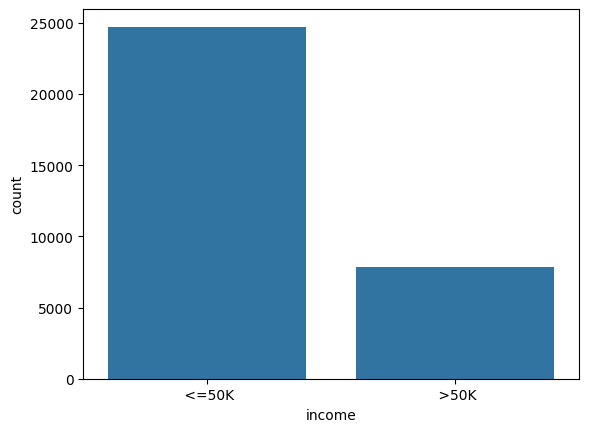

In [196]:
sns.countplot(x = base_census['income']);

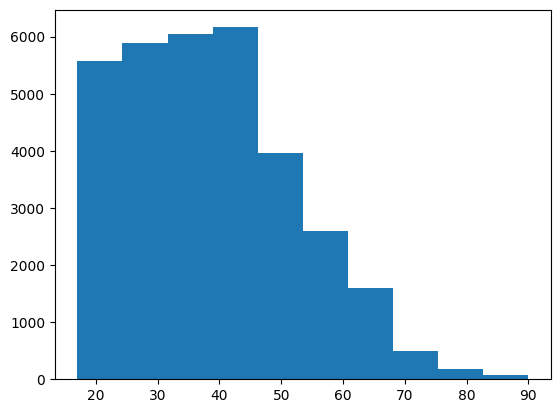

In [197]:
plt.hist(x = base_census['age']);

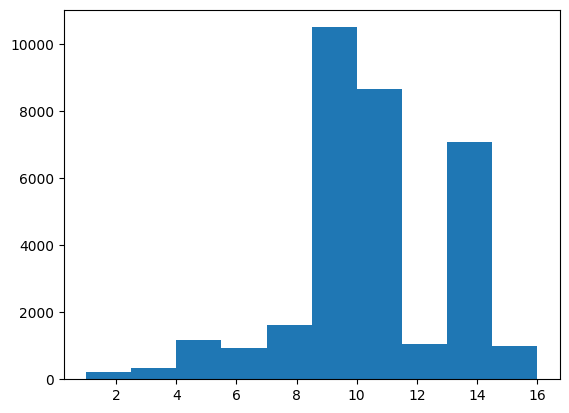

In [198]:
plt.hist(x = base_census['education-num']);

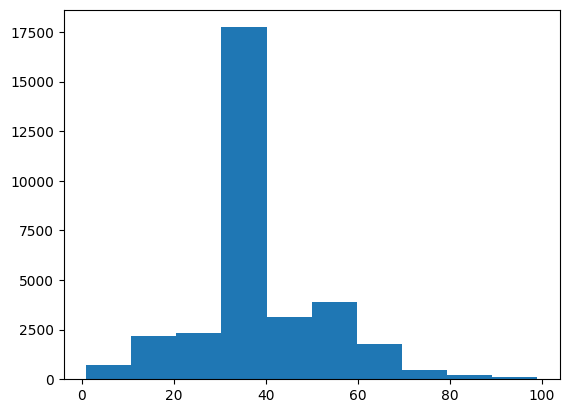

In [199]:
plt.hist(x = base_census['hour-per-week']);

In [200]:
grafico = px.treemap(base_census, path=['workclass', 'age'])
grafico.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [201]:
grafico = px.treemap(base_census, path=['occupation', 'relationship', 'age'])
grafico.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [202]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [203]:
grafico = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'income'])
grafico

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'dimensions': [{'label': 'workclass',
                              'values': array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
                                               ' Private', ' Self-emp-inc'], dtype=object)},
                             {'label': 'occupation',
                              'values': array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ...,
                                               ' Adm-clerical', ' Adm-clerical', ' Exec-managerial'], dtype=object)},
                             {'label': 'income',
                              'values': array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
                                              dtype=object)}],
              'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'name': '',
              'type': 'parcats'}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

In [204]:
grafico = px.parallel_categories(base_census, dimensions=['education', 'income'])
grafico

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'dimensions': [{'label': 'education',
                              'values': array([' Bachelors', ' Bachelors', ' HS-grad', ..., ' HS-grad', ' HS-grad',
                                               ' HS-grad'], dtype=object)},
                             {'label': 'income',
                              'values': array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
                                              dtype=object)}],
              'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'name': '',
              'type': 'parcats'}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

In [205]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [206]:
# novamente vamos dividir os previsores e classe
x_census = base_census.iloc[:, :14].values

In [207]:
x_census



array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [208]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [209]:
y_census = base_census.iloc[:, 14].values

In [210]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## LabelEncoder

In [211]:
from sklearn.preprocessing import LabelEncoder

In [212]:
label_encoder_teste = LabelEncoder()

In [213]:
x_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [214]:
teste = label_encoder_teste.fit_transform(x_census[:,1])

In [215]:
teste # substituido valores unicos por numeros

array([7, 6, 4, ..., 4, 4, 5])

In [216]:
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [217]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [218]:
# devemos colocar nos valores string
x_census[:, 1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:, 3] = label_encoder_education.fit_transform(x_census[:,1])
x_census[:, 5] = label_encoder_marital.fit_transform(x_census[:,1])
x_census[:, 6] = label_encoder_occupation.fit_transform(x_census[:,1])
x_census[:, 7] = label_encoder_relationship.fit_transform(x_census[:,1])
x_census[:, 8] = label_encoder_race.fit_transform(x_census[:,1])
x_census[:, 9] = label_encoder_sex.fit_transform(x_census[:,1])
x_census[:, 13] = label_encoder_country.fit_transform(x_census[:,1])

In [219]:
x_census[0] # todos em num agr

array([39, 7, 77516, 7, 13, 7, 7, 7, 7, 7, 2174, 0, 40, 7], dtype=object)

In [220]:
x_census

array([[39, 7, 77516, ..., 0, 40, 7],
       [50, 6, 83311, ..., 0, 13, 6],
       [38, 4, 215646, ..., 0, 40, 4],
       ...,
       [58, 4, 151910, ..., 0, 40, 4],
       [22, 4, 201490, ..., 0, 20, 4],
       [52, 5, 287927, ..., 0, 40, 5]], dtype=object)

## OneHotEncoder

In [221]:
'''
Carro               em uma coluna carro, cada componente recebe valores diferentes
gol  palho   uno    todos estão no mesmo preço, porém
1      2      3     o algoritimo vai colocar um peso maior no atributo mais alto(uno)
                    e por isso usamos o OneHotEncoder para ajustar esse erro


                    será adicionado novas colunas para consertar esse erro

gol     1 0 0
palho   0 1 0
uno     0 0 1

                    será adicionada um numero de colunas = qtd elementos da coluna
                    workclass possui 9 elementos

                    usando a base_census (workclass possui 9 elementos) exemplo
                    ficaria assim:
   
   State-gov,              private
1 0 0 0 0 0 0 0 0,    0 0 0 0 1 0 0 0 0


                    occupation possui 15 elementos

        Not-in-family                       Unmarried
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0,    0 0 0 0 0 0 0 0 0 0 1 0 0 0 0



                    dessa forma o problema de que um atributo fique
                    mais importante do que outro é resolvido
'''

'\nCarro               em uma coluna carro, cada componente recebe valores diferentes\ngol  palho   uno    todos estão no mesmo preço, porém\n1      2      3     o algoritimo vai colocar um peso maior no atributo mais alto(uno)\n                    e por isso usamos o OneHotEncoder para ajustar esse erro\n\n\n                    será adicionado novas colunas para consertar esse erro\n\ngol     1 0 0\npalho   0 1 0\nuno     0 0 1\n\n                    será adicionada um numero de colunas = qtd elementos da coluna\n                    workclass possui 9 elementos\n\n                    usando a base_census (workclass possui 9 elementos) exemplo\n                    ficaria assim:\n   \n   State-gov,              private\n1 0 0 0 0 0 0 0 0,    0 0 0 0 1 0 0 0 0\n\n\n                    occupation possui 15 elementos\n\n        Not-in-family                       Unmarried\n1 0 0 0 0 0 0 0 0 0 0 0 0 0 0,    0 0 0 0 0 0 0 0 0 0 1 0 0 0 0\n\n\n\n                    dessa forma o problema de

In [222]:
len(np.unique(base_census['workclass']))



9

In [223]:
len(np.unique(base_census['occupation']))



15

In [224]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



In [225]:
# pegamos os atributos la em cima e fazemos os ajustes para varias colunas                 esse remainder serve para não apagar os atributos 
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')



In [226]:
x_census = onehotencoder_census.fit_transform(x_census).toarray()


In [227]:

x_census # podemos perceber que existe um numero maior de colunas



array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [228]:
x_census.shape # antes eram 15 colunas, e agora são 108

 

(32561, 78)

In [229]:
# ainda existe atributos numericos com grande valor que devem ser ajustados

# lembrando que utilizamos o metodo da padronização


# ----------------------------------------------------------
# PADRONIZAÇÃO (standardisation)
# x = (x-média(x))/(desvio padrão(x))
# geralmente utilizado com dados muito fora do padrão

# ----------------------------------------------------------

# NORMALIZAÇÃO (normalization)
# x = (x - mínimo(x)/(máximo(x) - mínimo(x)))

# ----------------------------------------------------------

In [230]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [231]:
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.2444502 ,
       -0.17429511, -0.26209736, -0.01466381, -1.5167923 , -0.18838933,
       -0.29093568,  4.90769968, -0.02073999, -0.2444502 , -0.17429511,
       -0.26209736, -0.01466381, -1.5167923 , -0.18838933, -0.29093568,
        4.90769968, -0.02073999, -0.2444502 , -0.17429511, -0.26209736,
       -0.01466381, -1.5167923 , -0.18838933, -0.29093568,  4.90769968,
       -0.02073999, -0.2444502 , -0.17429511, -0.26209736, -0.01466381,
       -1.5167923 , -0.18838933, -0.29093568,  4.90769968, -0.02073999,
       -0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.2444502 ,
       -0.17429511, -0.26209736, -0.01466381, -1.5167923 , -0.18838933,
       -0.29093568,  4.90769968, -0.02073999, -0.2444502 , -0.17429511,
       -0.26209736, -0.01466381, -1.5167923 , -0.18838933, -0.29

## Divisão das bases em treinamento e teste

In [232]:
# aula 29 para mais detalhes
from sklearn.model_selection import train_test_split

### Credit data

In [233]:
# x significa os previsores e y indica a classe                                                                                                                  
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size=0.25, random_state=0)

In [234]:
x_credit_treinamento.shape # 1500 registros para enviar para o sistema aprender

(1500, 3)

In [235]:
y_credit_treinamento.shape

(1500,)

In [236]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

### Census

In [237]:
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census, y_census, test_size=0.15, random_state=0)

In [238]:
x_census_treinamento.shape

(27676, 78)

In [239]:
y_census_treinamento.shape

(27676,)

In [240]:
x_census_teste.shape, y_census_teste.shape

((4885, 78), (4885,))

In [241]:
import pickle

### Checkpoint

In [242]:
with open('credit.pkl', mode='wb') as f:
    pickle.dump([x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste], f)

In [243]:
with open('census.pkl', mode='wb') as f:
    pickle.dump([x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste], f)

## Naïve bayes

In [244]:
# aula 34 para entender melhor

In [245]:
from sklearn.naive_bayes import GaussianNB

In [246]:
base_risco_credito = pd.read_csv("C:/Users/danil/OneDrive/Documentos/Machine Learning e Data Science com Python de A à Z-20240611T140920Z-001/Machine Learning e Data Science com Python de A à Z/Bases de dados/risco_credito.csv")

In [247]:
base_risco_credito

historia divida garantias     renda     risco
0           ruim   alta   nenhuma      0_15      alto
1   desconhecida   alta   nenhuma     15_35      alto
2   desconhecida  baixa   nenhuma     15_35  moderado
3   desconhecida  baixa   nenhuma  acima_35      alto
4   desconhecida  baixa   nenhuma  acima_35     baixo
5   desconhecida  baixa  adequada  acima_35     baixo
6           ruim  baixa   nenhuma      0_15      alto
7           ruim  baixa  adequada  acima_35  moderado
8            boa  baixa   nenhuma  acima_35     baixo
9            boa   alta  adequada  acima_35     baixo
10           boa   alta   nenhuma      0_15      alto
11           boa   alta   nenhuma     15_35  moderado
12           boa   alta   nenhuma  acima_35     baixo
13          ruim   alta   nenhuma     15_35      alto

In [248]:
# x será os atributos previsores
# y será a classe

x_risco_credito = base_risco_credito.iloc[:,0:4].values
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [249]:
y_risco_credito = base_risco_credito.iloc[:,4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [250]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [251]:
x_risco_credito[:,0] = label_encoder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito[:,1] = label_encoder_divida.fit_transform(x_risco_credito[:,1])
x_risco_credito[:,2] = label_encoder_garantia.fit_transform(x_risco_credito[:,2])
x_risco_credito[:,3] = label_encoder_renda.fit_transform(x_risco_credito[:,3])

In [252]:
# essa base de dados é pequena... Não usaremos o OneHotEncoder nessa base em especifico

x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [253]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([x_risco_credito, y_risco_credito], f)

In [254]:
naive_risco_credito = GaussianNB()

# aqui é feito o treinamento do algoritimo!
# "fit" é responsável por criar a tabela de probabilidade
naive_risco_credito.fit(x_risco_credito, y_risco_credito) 

GaussianNB()

In [255]:
# historia boa(0), divida alta(0), garantia nenhuma(1), renda > 35(2)
# historia ruim(2), divida alta(0), garantia adequada(0), renda < 15(0)

previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])

In [256]:
previsao # ele retornou somente a classe sem o n° de probabilidade

array(['baixo', 'moderado'], dtype='<U8')

In [257]:
# contar quantos atributos de cada classe
naive_risco_credito.class_count_

array([6., 5., 3.])

In [258]:
# valor da priori
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

In [259]:
# infelizmente não é possivel ver a probabilidade

### Base credit data

In [260]:
import pickle

with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [261]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [262]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [263]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [264]:
previsoes = naive_credit_data.predict(x_credit_teste)

In [265]:
# previsões da base
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [266]:
# gabarito da base
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [267]:
# vamos agr comparar as respostas usando essa biblioteca
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [268]:
accuracy_score(y_credit_teste, previsoes) # 93,8% de acerto

0.938

In [269]:
confusion_matrix(y_credit_teste, previsoes)

'''
428 clientes que pagam e foram classificados como pagam, 8 clientes que pagam e foram classificados que não pagam
23 naõ pagam, mas foram classificados como que pagam e 41 que não pagam e foram classificados que não pagam
'''

'\n428 clientes que pagam e foram classificados como pagam, 8 clientes que pagam e foram classificados que não pagam\n23 naõ pagam, mas foram classificados como que pagam e 41 que não pagam e foram classificados que não pagam\n'

In [270]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



### Base census

In [271]:
import pickle

with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [272]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 78), (27676,))

In [273]:
x_census_teste.shape, y_census_teste.shape

((4885, 78), (4885,))

In [274]:
naive_census = GaussianNB()
naive_census.fit(x_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(x_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype='<U6')

In [275]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [276]:
accuracy_score(y_census_teste, previsoes) # taxa de acerto de 24%

0.2444216990788127

In [277]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       1.00      0.00      0.00      3693
        >50K       0.24      1.00      0.39      1192

    accuracy                           0.24      4885
   macro avg       0.62      0.50      0.20      4885
weighted avg       0.82      0.24      0.10      4885



## Árvore de decisão

In [278]:
from sklearn.tree import DecisionTreeClassifier

In [279]:
# entropy(s) = -Pi * log2Pi  (Pi não é o pi - 3,14)
# e(s) = -6/14 * log(6/14;2) - 3/14 * log(3/14;2) - 5/14 * log(5/14;2) = 1,53

# gain(s, a) = entropy(s) - |Sv|/|S|
# g(historia)
# g(divida)
# g(garantias)
# g(renda)

### Base risco de crédito

In [280]:
import pickle

with open('risco_credito.pkl', 'rb') as f:
    x_risco_credito, y_risco_credito = pickle.load(f)

In [281]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [282]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [283]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [284]:
arvore_risco_credito.feature_importances_

array([0.41607015, 0.10294068, 0.03885431, 0.44213486])

In [285]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

[Text(0.5555555555555556, 0.9166666666666666, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(0.3333333333333333, 0.75, 'história <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(0.2222222222222222, 0.5833333333333334, 'renda <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(0.1111111111111111, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(0.3333333333333333, 0.4166666666666667, 'história <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 0, 2]\nclass = moderado'),
 Text(0.2222222222222222, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.4444444444444444, 0.25, 'dívida <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]\nclass = alto'),
 Text(0.3333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(0.5555555555555556, 0.08333333333333333, 'entropy = 0.0\nsample

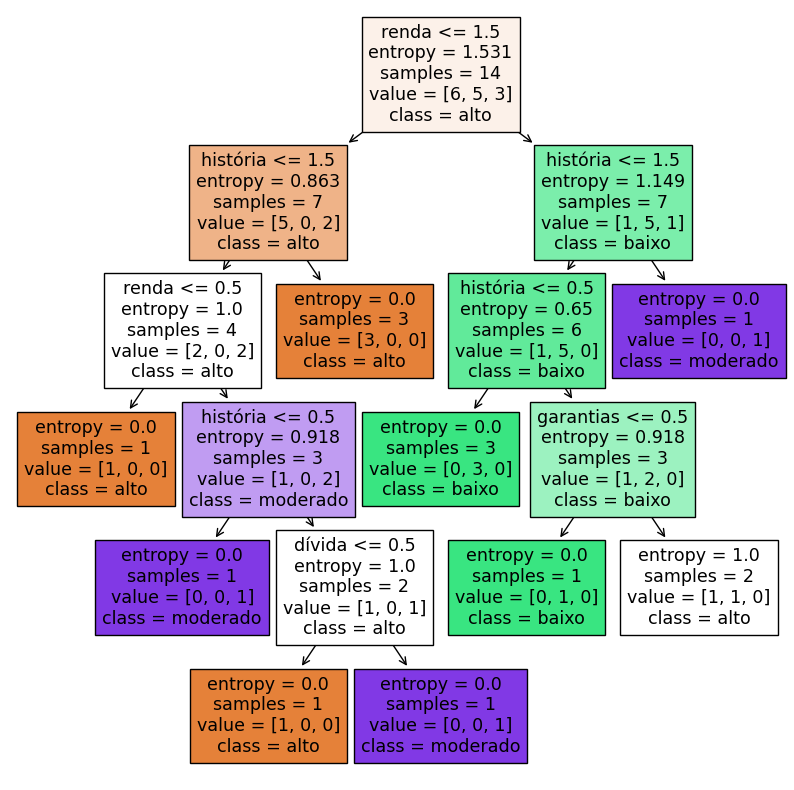

In [286]:
from sklearn import tree
previsores = ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True)

In [287]:
# historia boa(0), divida alta(0), garantia nenhuma(1), renda > 35(2)
# historia ruim(2), divida alta(0), garantia adequada(0), renda < 15(0)
previsoes = arvore_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

### Base credit data

In [288]:
import pickle

with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [289]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [290]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [291]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [292]:
previsoes = arvore_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [293]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [294]:
from sklearn.metrics import accuracy_score, classification_report

In [295]:
accuracy_score(y_credit_teste, previsoes) # resultado melhor que naives

0.982

In [296]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



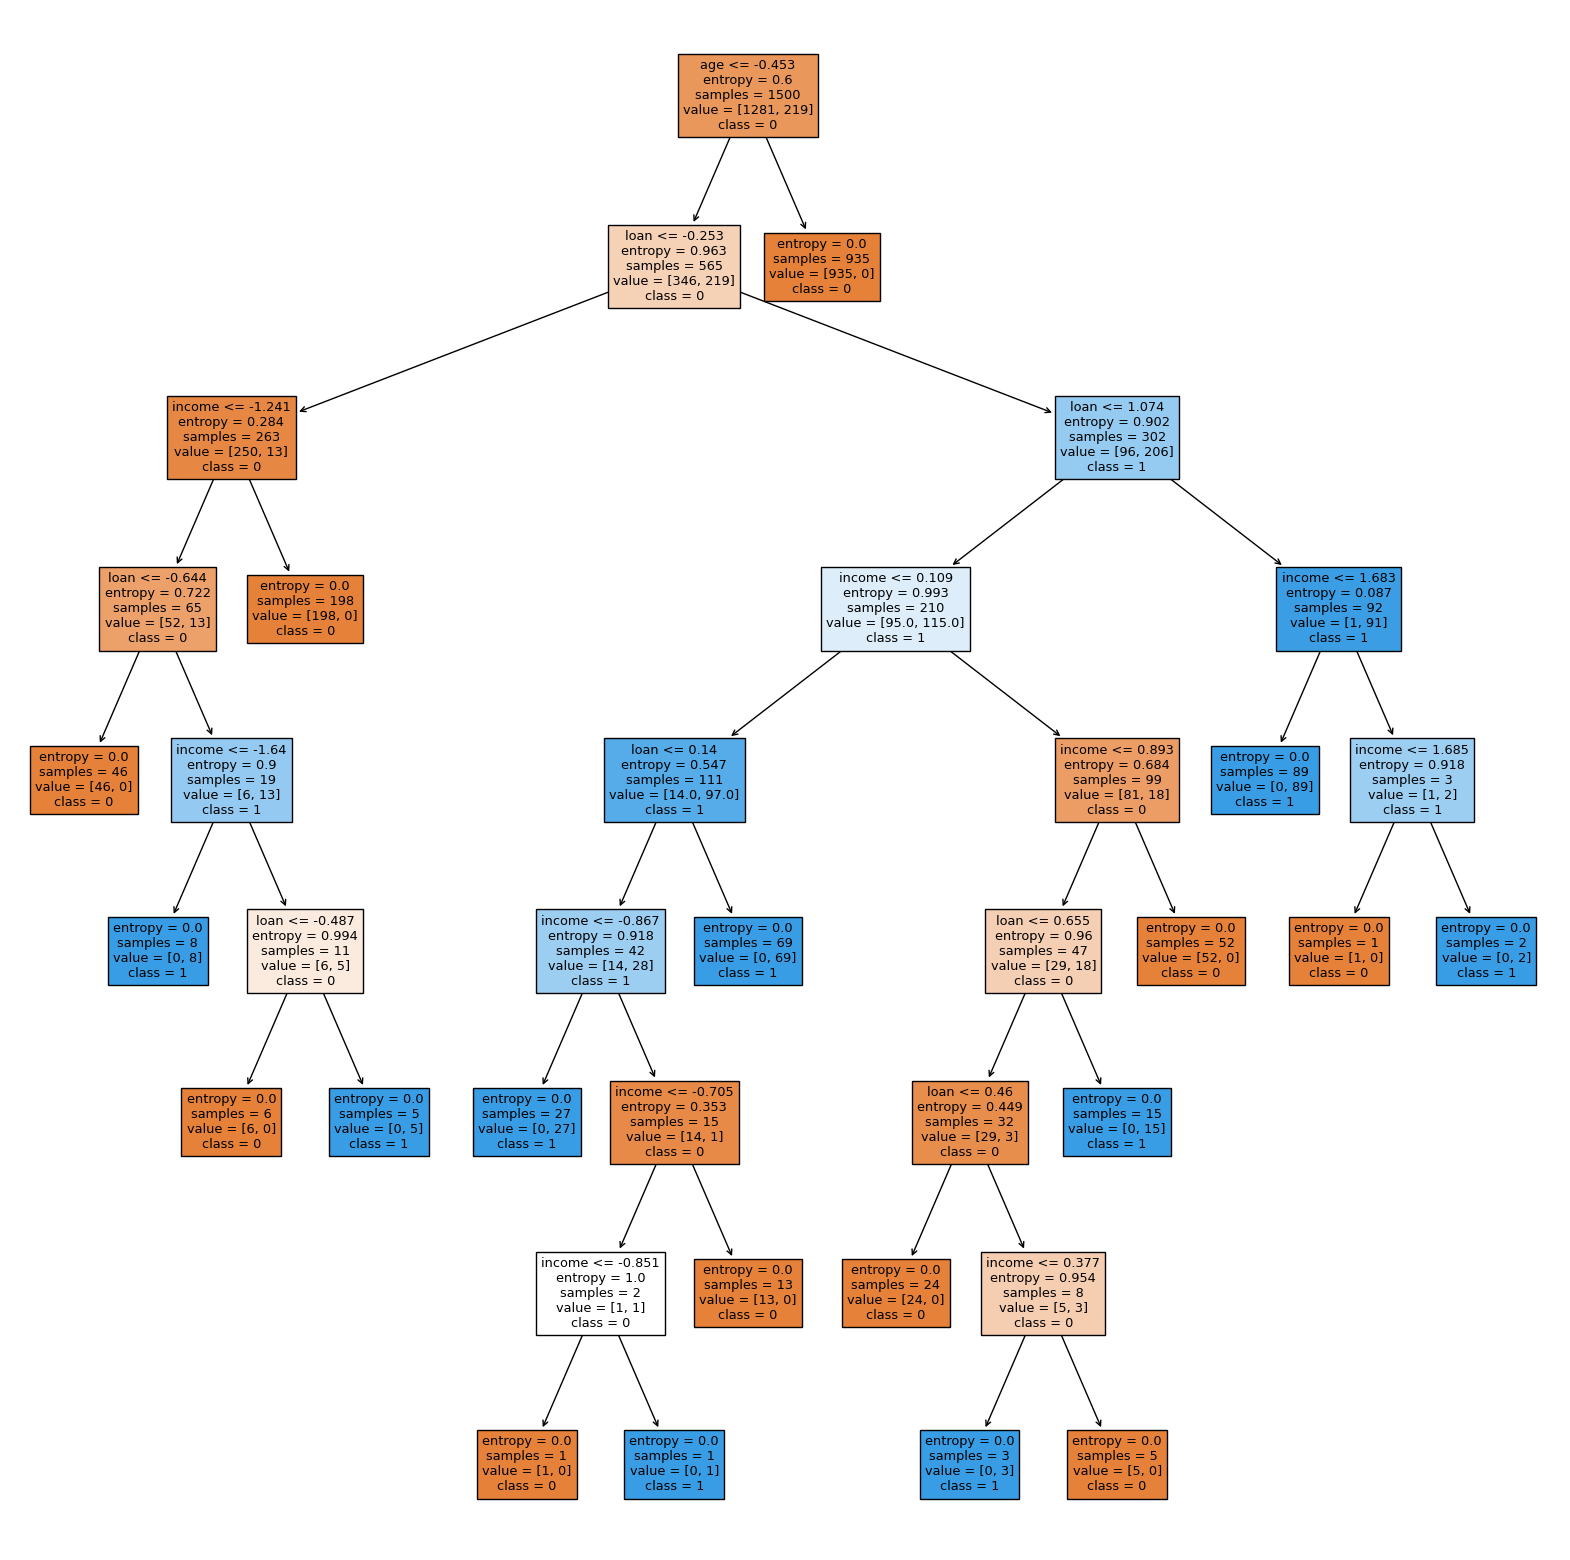

In [297]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize= (20, 20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0', '1'], filled=True);
fig.savefig('arvore_credit.png')

### Base census

In [298]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [299]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 78), (27676,))

In [300]:
x_census_teste.shape, y_census_teste.shape

((4885, 78), (4885,))

In [301]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(x_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [302]:
previsoes = arvore_census.predict(x_census_teste)
previsoes

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [303]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [304]:
accuracy_score(y_census_teste, previsoes) # melhor que antes

0.768474923234391

## Random Forest

In [305]:
from sklearn.ensemble import RandomForestClassifier

### Base credit data

In [306]:
import pickle

with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [307]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [308]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [309]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_credit.fit(x_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [310]:
previsoes = random_forest_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [311]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [312]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.984

In [313]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



### Base census

In [314]:
import pickle

with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [315]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 78), (27676,))

In [316]:
x_census_teste.shape, y_census_teste.shape

((4885, 78), (4885,))

In [317]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_census.fit(x_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [318]:
previsoes = random_forest_census.predict(x_census_teste)
previsoes

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [319]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [320]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8155578300921187

In [321]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.88      3693
        >50K       0.65      0.53      0.58      1192

    accuracy                           0.82      4885
   macro avg       0.75      0.72      0.73      4885
weighted avg       0.81      0.82      0.81      4885



## Regras

### Base risco credito

In [322]:
# o sklearn não possui algoritimo especifico para geração de regras
# pip install Orange3

# ASSISTIR SESSÃO 6

In [323]:
import Orange

In [324]:
base_risco_credito = Orange.data.Table("C:/Users/danil/OneDrive/Documentos/Machine Learning e Data Science com Python de A à Z-20240611T140920Z-001/Machine Learning e Data Science com Python de A à Z/Bases de dados/risco_credito_regras.csv")
base_risco_credito

[[ruim, alta, nenhuma, 0_15 | alto],
 [desconhecida, alta, nenhuma, 15_35 | alto],
 [desconhecida, baixa, nenhuma, 15_35 | moderado],
 [desconhecida, baixa, nenhuma, acima_35 | alto],
 [desconhecida, baixa, nenhuma, acima_35 | baixo],
 ...
]

In [325]:
base_risco_credito.domain

[historia, divida, garantias, renda | risco]

In [326]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [327]:
for regras in regras_risco_credito.rule_list:
    print(regras)

IF renda==0_15 THEN risco=alto 
IF historia==boa AND divida!=alta THEN risco=baixo 
IF historia==boa AND garantias!=nenhuma THEN risco=baixo 
IF historia==boa AND renda!=15_35 THEN risco=baixo 
IF historia==boa THEN risco=moderado 
IF divida==alta THEN risco=alto 
IF historia!=desconhecida THEN risco=moderado 
IF garantias==adequada THEN risco=baixo 
IF renda==15_35 THEN risco=moderado 
IF historia==desconhecida THEN risco=baixo 
IF TRUE THEN risco=alto 


In [328]:
# historia boa(0), divida alta(0), garantia nenhuma(1), renda > 35(2)
# historia ruim(2), divida alta(0), garantia adequada(0), renda < 15(0)

# não precisamos usar o label encoder pois o algoritimo sabe trabalhar com atributos categoricos

previsoes = regras_risco_credito([['boa', 'alta', 'nenhuma', 'acima_35'], ['ruim', 'alta', 'adequada', '0_15']])
previsoes

array([1, 0], dtype=int64)

In [329]:
base_risco_credito.domain.class_var.values

('alto', 'baixo', 'moderado')

In [330]:
for i in previsoes:
    # print(i)
    print(base_risco_credito.domain.class_var.values[i])

baixo
alto


### Base credito

In [331]:
base_credit = Orange.data.Table("C:/Users/danil/OneDrive/Documentos/Machine Learning e Data Science com Python de A à Z-20240611T140920Z-001/Machine Learning e Data Science com Python de A à Z/Bases de dados/credit_data_regras.csv")

In [332]:
base_credit.domain

[income, age, loan | default]

In [333]:
# import Orange.evaluation
base_dividida = Orange.evaluation.testing.sample(base_credit, n=0.25)

In [334]:
base_dividida[0]

[[67465.1, 23.6111, 1802.62 | 0],
 [58507.6, 48.9774, 694.135 | 0],
 [34615.5, 25.5144, 6476.76 | 1],
 [59475.5, 36.7371, 2628.26 | 0],
 [33756.5, 40.5676, 1169.84 | 0],
 ...
]

In [335]:
base_dividida[1]

[[60122, 62.9096, 7189.35 | 0],
 [57296.2, 25.7085, 10601.1 | 1],
 [62657.6, 28.1743, 5771.09 | 0],
 [41435.2, 34.9257, 3702.17 | 0],
 [33261.6, 18.2296, 586.651 | 0],
 ...
]

In [336]:
base_treinamento = base_dividida[1]
base_teste = base_dividida[0]

In [337]:
len(base_treinamento), len(base_teste)

(1500, 500)

In [338]:
import Orange.classification


cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_treinamento)

In [339]:
for regras in regras_credit.rule_list:
    print(regras)

IF age>=34.9257164876908 THEN default=0 
IF income>=69695.1504494064 THEN default=1 
IF loan<=2495.13299137587 AND income>=20145.9885970689 THEN default=0 
IF age<=18.075335860718 AND income>=50501.7266888171 THEN default=0 
IF loan>=7708.31562497011 AND age>=20.6656169872731 THEN default=1 
IF income>=47683.715778403 AND loan>=8092.982779946221 THEN default=1 
IF income>=58132.4712652713 THEN default=0 
IF age>=34.7514377613552 THEN default=1 
IF loan>=6342.56790924236 THEN default=1 
IF income>=46696.8926647678 AND income>=50360.6787929311 THEN default=0 
IF loan>=3682.8619314122707 AND loan>=5785.88427485782 THEN default=1 
IF loan<=3052.5766906145695 AND income>=24857.6948815025 THEN default=0 
IF income>=45971.133494749694 THEN default=0 
IF loan>=5416.3577980789005 THEN default=1 
IF loan<=3196.5597688723497 AND loan>=3196.5597688723497 THEN default=0 
IF loan<=3317.52987409072 AND loan>=3317.52987409072 THEN default=0 
IF loan<=3394.65824024028 AND age>=34.7410444347188 THEN def

In [340]:
# import Orange.evaluation


previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, [lambda testdata: regras_credit])

In [341]:
previsoes

In [342]:
'''
importando o Orange.evaluation tive um resultado bom, mas é melhor se eu não importar... porem o
import Orange.classification me deu um resultado melhor
'''

Orange.evaluation.CA(previsoes)

array([0.978])

## Classificador base - Majority learner


### Base credit data

In [343]:
base_credit = Orange.data.Table("C:/Users/danil/OneDrive/Documentos/Machine Learning e Data Science com Python de A à Z-20240611T140920Z-001/Machine Learning e Data Science com Python de A à Z/Bases de dados/credit_data_regras.csv")

In [344]:
base_credit.domain

[income, age, loan | default]

In [345]:
majority = Orange.classification.MajorityLearner()

In [346]:
# import Orange.evaluation


previsoes = Orange.evaluation.TestOnTestData(base_credit, base_credit, [majority])

In [347]:
Orange.evaluation.CA(previsoes)

array([0.8585])

In [348]:
for registro in base_credit:
    print(registro.get_class())

0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0


In [349]:
from collections import Counter
Counter(str(registro.get_class()) for registro in base_credit)

Counter({'0': 1717, '1': 283})

In [350]:
1717 / 2000

0.8585

### Base census

In [351]:
base_census = Orange.data.Table("C:/Users/danil/OneDrive/Documentos/Machine Learning e Data Science com Python de A à Z-20240611T140920Z-001/Machine Learning e Data Science com Python de A à Z/Bases de dados/census_regras.csv")

In [352]:
base_census.domain

[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

In [353]:
majority = Orange.classification.MajorityLearner()
previsoes = Orange.evaluation.testing.TestOnTestData(base_census, base_census, [majority])
Orange.evaluation.CA(previsoes)

array([0.75919044])

In [354]:
Counter(str(registro.get_class()) for registro in base_census)

Counter({'<=50K': 24720, '>50K': 7841})

## kNN

In [355]:
from sklearn.neighbors import KNeighborsClassifier

In [356]:
'''
calcular a distancia

Distancia Euclidiana: DE(x, y) = raiz(somatorio(xi - yi)²)

ex:
x = 5, 7, 9       DE(x=5, y=5) = raiz(somatorio(5 - 5)²)   
y = 5, 5, 5       DE(x=5, y=5) = raiz(somatorio(0)²)
                  DE(x=5, y=5) = raiz(somatorio(0))   guardamos o valor para depois usarmos o somatorio
                                 
                  DE(x=7, y=5) = raiz(somatorio(7 - 5)²)
                  DE(x=7, y=5) = raiz(somatorio(2)²)
                  DE(x=7, y=5) = raiz(somatorio(4))   guardamos o valor para depois usarmos o somatorio

                  DE(x=9, y=5) = raiz(somatorio(9 - 5)²)
                  DE(x=9, y=5) = raiz(somatorio(4)²)
                  DE(x=9, y=5) = raiz(somatorio(16))  guardamos o valor para depois usarmos o somatorio

                                 agora faremos o somatorio
                            DE = raiz(somatorio(0 + 4 + 16))
                            DE = raiz(20)
                            "DE = 4,47"
'''

'\ncalcular a distancia\n\nDistancia Euclidiana: DE(x, y) = raiz(somatorio(xi - yi)²)\n\nex:\nx = 5, 7, 9       DE(x=5, y=5) = raiz(somatorio(5 - 5)²)   \ny = 5, 5, 5       DE(x=5, y=5) = raiz(somatorio(0)²)\n                  DE(x=5, y=5) = raiz(somatorio(0))   guardamos o valor para depois usarmos o somatorio\n                                 \n                  DE(x=7, y=5) = raiz(somatorio(7 - 5)²)\n                  DE(x=7, y=5) = raiz(somatorio(2)²)\n                  DE(x=7, y=5) = raiz(somatorio(4))   guardamos o valor para depois usarmos o somatorio\n\n                  DE(x=9, y=5) = raiz(somatorio(9 - 5)²)\n                  DE(x=9, y=5) = raiz(somatorio(4)²)\n                  DE(x=9, y=5) = raiz(somatorio(16))  guardamos o valor para depois usarmos o somatorio\n\n                                 agora faremos o somatorio\n                            DE = raiz(somatorio(0 + 4 + 16))\n                            DE = raiz(20)\n                            "DE = 4,47"\n'

### Base credit data

In [357]:
import pickle
with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [358]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [359]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [360]:
# "minkowski" é a métrica de distância que será utilizada para o cálculo da similaridade entre os registros
# o parâmetro "p" está presente somente na métrica "minkowski" e tem dois valores, 1 - é para a 
# distância manhattan e o 2 - é para distância euclidiana
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_credit.fit(x_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier()

In [361]:
previsoes = knn_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [362]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [363]:
from sklearn.metrics import accuracy_score
accuracy_score(y_credit_teste, previsoes)

0.986

In [364]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



### Base census

In [365]:
import pickle
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [366]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 78), (27676,))

In [367]:
x_census_teste.shape, y_census_teste.shape

((4885, 78), (4885,))

In [368]:
# não precisa passar a metrica=minkowski e o P=2, pq eles são padrão
knn_census = KNeighborsClassifier(n_neighbors=10)
knn_census.fit(x_census_treinamento, y_census_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [369]:
previsoes = knn_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [370]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [371]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.812691914022518

In [372]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.88      3693
        >50K       0.70      0.41      0.51      1192

    accuracy                           0.81      4885
   macro avg       0.77      0.68      0.70      4885
weighted avg       0.80      0.81      0.79      4885



## Regressão logística

In [373]:
from sklearn.linear_model import LogisticRegression
import pickle

### Base risco de crédito

In [374]:
with open('risco_credito.pkl', 'rb') as f:
    x_risco_credito, y_risco_credito = pickle.load(f)

In [375]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [376]:
# temos que apagar o "moderado"
y_risco_credito # 2, 7, 11

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [377]:
                                                       # axix=0 indica que excluirá a liha
                                                       # axix=1 é a coluna 
x_risco_credito = np.delete(x_risco_credito, [2, 7, 11], axis=0)
y_risco_credito = np.delete(y_risco_credito, [2, 7, 11], axis=0)



In [378]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [379]:
y_risco_credito

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

In [380]:
logistc_risco_credito = LogisticRegression(random_state=1)
logistc_risco_credito.fit(x_risco_credito, y_risco_credito)

LogisticRegression(random_state=1)

In [381]:
# esse é o b0
logistc_risco_credito.intercept_

array([-0.80855152])

In [382]:
# os coeficientes:
# b1: historia do credito 
# b2: dívida 
# b3: garantias 
# b4: renda anual
logistc_risco_credito.coef_

array([[-0.76706797,  0.23921064, -0.47989768,  1.12196145]])

In [383]:
# historia boa(0), divida alta(0), garantia nenhuma(1), renda > 35(2)
# historia ruim(2), divida alta(0), garantia adequada(0), renda < 15(0)
previsoes1 = logistc_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsoes1

array(['baixo', 'alto'], dtype=object)

### Base credit data

In [384]:
with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [385]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [386]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [387]:
logistc_credit = LogisticRegression(random_state=1)
logistc_credit.fit(x_credit_treinamento, y_credit_treinamento)

LogisticRegression(random_state=1)

In [388]:
logistc_credit.intercept_

array([-6.03333114])

In [389]:
logistc_credit.coef_

array([[-2.55275554, -3.72391763,  3.94333319]])

In [390]:
previsoes = logistc_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [391]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [392]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.946

In [393]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



### Base census

In [394]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [395]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 78), (27676,))

In [396]:
x_census_teste.shape, y_census_teste.shape

((4885, 78), (4885,))

In [397]:
logistc_census = LogisticRegression(random_state=1)
logistc_census.fit(x_census_treinamento, y_census_treinamento)

LogisticRegression(random_state=1)

In [398]:
previsoes = logistc_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [399]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [400]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8147389969293757

In [401]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89      3693
        >50K       0.71      0.40      0.51      1192

    accuracy                           0.81      4885
   macro avg       0.77      0.67      0.70      4885
weighted avg       0.80      0.81      0.79      4885



## SVM

In [402]:
from sklearn.svm import SVC
import pickle

### Base credit

In [403]:
with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [404]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [405]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [406]:
# tipos de kernel: linear, poly, rbf, sigmoid
svm_credit = SVC(kernel='rbf', random_state=1, C=2.0)
svm_credit.fit(x_credit_treinamento, y_credit_treinamento)

SVC(C=2.0, random_state=1)

In [407]:
previsoes = svm_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [408]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [409]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_credit_teste, previsoes))

0.988


In [410]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



### Base census

In [411]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [412]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 78), (27676,))

In [413]:
x_census_teste.shape, y_census_teste.shape

((4885, 78), (4885,))

In [414]:
svm_census = SVC(kernel='rbf', random_state=1, C=4.0)
svm_census.fit(x_census_treinamento, y_census_treinamento)

SVC(C=4.0, random_state=1)

In [415]:
previsoes = svm_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [416]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [417]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8128966223132037

In [418]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.81      0.98      0.89      3693
        >50K       0.80      0.31      0.45      1192

    accuracy                           0.81      4885
   macro avg       0.81      0.64      0.67      4885
weighted avg       0.81      0.81      0.78      4885



# REDES NEURAIS ARTIFICIAIS

In [419]:
from sklearn.neural_network import MLPClassifier

In [420]:
'''
neurônio: processa as inforações
axônio: transmite sinal de um neurônio para outro (sinapses)

entrada -- neuronios e axonios -- saída

--------------------------------------------------------------
entradas: x1, x2, x3... xn
pesos: w1, w2, w3... wn
função soma: soma
função ativação: se for maior que 1 ele ativa

soma = xi * wi -- soma = x1 * w1 + x2 * w2 + x3 * w3 + xn * wn

--------------------------------------------------------------


ex:
    entradas: 1, 7, 5
    pesos: 0.8, 0.1, 0

    soma = (1 * 0.8) + (7 * 0.1) + (5 * 0)
    soma = 1.5

    função ativação: 1.5 > 1, ativado

----------------------------------------------    

ex:
    entradas: -1, 7, 5
    pesos: 0.8, 0.1, 0

    soma = (-1 * 0.8) + (7 * 0.1) + (5 * 0)
    soma = -0.1

    função ativação: step(função degrau): -0.1 < 1, não ativado

---------------------------------------------------------------   


step function:

primeira função(básica): ela ativa ou não (1 ou 0)!
                    __________
                    |
                    |
                    |
            ________|

__________________________________________________________

sigmoid function:

y = 1 / (1 + e^-x)

não é somente "0 ou 1"
se x for alto então o valor é proximo a 1
se x for baixo então o valor é proximo a 0
não tem valores negativos

__________________________________________________________

function hyperbolic tangent:

y = (e^x - e^-x)/(e^x + e^-x)

valores entre -1 e 1
                    
---------------------------------------------------------------

Erro: "erro" é um calculo feito para saber quanto erro a rede neural está gerando
com os erros correspondentes

ex:
    algoritimo mais simples
    
    erro = respostaCorreta - respostaErrada

ex2:
    formula para atualizar os pesos(os pesos são atualizados até os erros serem pequenos)

    peso(n + 1) = peso(n) + (taxaAprendizagem * entrada * erro)


---------------------------------------------------------------

y: função de ativação (sigmoid)
derivada = y * (y - 1) "serve para saber a direção que devemos ir"
delta saída = erro * derivada
delta oculto = derivada * peso(segundo) * delta saída
momento: escapar de mínimos locais (nem sempre funciona)
backpropagation: peso(n + 1) = peso(n) * momento + (entrada * delta * taxaAprendizagem)

---------------------------------------------------------------

1. inicializa pesos aleatorios
2. calcula saídas  <-----+
3. calcula o erro        |
4. calcula pesos         |
5. atualiza novos pesos  |
6. erro é pequeno?       |
    6.1: não! -----------+
    6.2: sim! -----------> fim
'''



'\nneurônio: processa as inforações\naxônio: transmite sinal de um neurônio para outro (sinapses)\n\nentrada -- neuronios e axonios -- saída\n\n--------------------------------------------------------------\nentradas: x1, x2, x3... xn\npesos: w1, w2, w3... wn\nfunção soma: soma\nfunção ativação: se for maior que 1 ele ativa\n\nsoma = xi * wi -- soma = x1 * w1 + x2 * w2 + x3 * w3 + xn * wn\n\n--------------------------------------------------------------\n\n\nex:\n    entradas: 1, 7, 5\n    pesos: 0.8, 0.1, 0\n\n    soma = (1 * 0.8) + (7 * 0.1) + (5 * 0)\n    soma = 1.5\n\n    função ativação: 1.5 > 1, ativado\n\n----------------------------------------------    \n\nex:\n    entradas: -1, 7, 5\n    pesos: 0.8, 0.1, 0\n\n    soma = (-1 * 0.8) + (7 * 0.1) + (5 * 0)\n    soma = -0.1\n\n    função ativação: step(função degrau): -0.1 < 1, não ativado\n\n---------------------------------------------------------------   \n\n\nstep function:\n\nprimeira função(básica): ela ativa ou não (1 ou 0)

## Base credit data

In [421]:
import pickle

with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [422]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [423]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [424]:
# (N° de colunas + 1) / 2
(3 + 1)/2

2.0

In [438]:
rede_neural_credit = MLPClassifier(max_iter=1000, verbose=True, tol=0.0000100, hidden_layer_sizes=(2, 2))
rede_neural_credit.fit(x_credit_treinamento, y_credit_treinamento)

Iteration 1, loss = 0.47113166
Iteration 2, loss = 0.46676729
Iteration 3, loss = 0.46236462
Iteration 4, loss = 0.45816315
Iteration 5, loss = 0.45386296
Iteration 6, loss = 0.44967045
Iteration 7, loss = 0.44540714
Iteration 8, loss = 0.44128378
Iteration 9, loss = 0.43702975
Iteration 10, loss = 0.43281042
Iteration 11, loss = 0.42866255
Iteration 12, loss = 0.42455196
Iteration 13, loss = 0.42036795
Iteration 14, loss = 0.41629499
Iteration 15, loss = 0.41225432
Iteration 16, loss = 0.40828565
Iteration 17, loss = 0.40429604
Iteration 18, loss = 0.40030801
Iteration 19, loss = 0.39651653
Iteration 20, loss = 0.39247355
Iteration 21, loss = 0.38781642
Iteration 22, loss = 0.38304508
Iteration 23, loss = 0.37831525
Iteration 24, loss = 0.37362486
Iteration 25, loss = 0.36910347
Iteration 26, loss = 0.36477167
Iteration 27, loss = 0.36047152
Iteration 28, loss = 0.35629574
Iteration 29, loss = 0.35224035
Iteration 30, loss = 0.34835874
Iteration 31, loss = 0.34453639
Iteration 32, los

c:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=1000, tol=1e-05, verbose=True)

In [439]:
previsoes = rede_neural_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [440]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [441]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

1.0

In [442]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       1.00      1.00      1.00        64

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



## Base census

In [443]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [444]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 78), (27676,))

In [445]:
x_census_teste.shape, y_census_teste.shape

((4885, 78), (4885,))

In [446]:
(78 +1)/2

39.5

In [447]:
rede_neural_census = MLPClassifier(max_iter=1000, verbose=True, tol=0.0000100, hidden_layer_sizes=(40, 40))
rede_neural_census.fit(x_census_treinamento, y_census_treinamento)

Iteration 1, loss = 0.46305156
Iteration 2, loss = 0.40339764
Iteration 3, loss = 0.39292886
Iteration 4, loss = 0.38911483
Iteration 5, loss = 0.38661382
Iteration 6, loss = 0.38486974
Iteration 7, loss = 0.38412715
Iteration 8, loss = 0.38343244
Iteration 9, loss = 0.38209723
Iteration 10, loss = 0.38272097
Iteration 11, loss = 0.38099725
Iteration 12, loss = 0.38083839
Iteration 13, loss = 0.38052131
Iteration 14, loss = 0.37940984
Iteration 15, loss = 0.37865623
Iteration 16, loss = 0.37872161
Iteration 17, loss = 0.37866086
Iteration 18, loss = 0.37726008
Iteration 19, loss = 0.37676764
Iteration 20, loss = 0.37735233
Iteration 21, loss = 0.37651572
Iteration 22, loss = 0.37573495
Iteration 23, loss = 0.37569712
Iteration 24, loss = 0.37647562
Iteration 25, loss = 0.37551729
Iteration 26, loss = 0.37443536
Iteration 27, loss = 0.37444323
Iteration 28, loss = 0.37437522
Iteration 29, loss = 0.37326635
Iteration 30, loss = 0.37367314
Iteration 31, loss = 0.37335579
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(40, 40), max_iter=1000, tol=1e-05,
              verbose=True)

In [448]:
previsoes = rede_neural_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [449]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [450]:
accuracy_score(y_census_teste, previsoes)

0.8235414534288639